# Analyzing Vehicle Emissions Using Machine Learning Models

## Project Overview
This project analyzes vehicle fuel consumption and emissions data to:
- Explore relationships between engine characteristics and CO₂ emissions
- Build regression models to predict emissions
- Compare linear models with tree-based approaches
- Interpret feature importance for policy and engineering insights

### Exploratory Data Analysis (EDA)

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import pandas as pd
# Importing data
df = pd.read_csv('Fuel_Consumption_Rating_2023.csv', encoding='latin1')

# Displaying first few rows to inspect data
print(df.head())

   Year   Make              Model  Vehicle Class  Engine Size (L)  Cylinders  \
0  2023  Acura            Integra      Full-size              1.5        4.0   
1  2023  Acura     Integra A-SPEC      Full-size              1.5        4.0   
2  2023  Acura     Integra A-SPEC      Full-size              1.5        4.0   
3  2023  Acura         MDX SH-AWD     SUV: Small              3.5        6.0   
4  2023  Acura  MDX SH-AWD Type S  SUV: Standard              3.0        6.0   

  Transmission Fuel Type  Fuel Consumption (L/100Km)  Hwy (L/100 km)  \
0          AV7         Z                         7.9             6.3   
1          AV7         Z                         8.1             6.5   
2           M6         Z                         8.9             6.5   
3         AS10         Z                        12.6             9.4   
4         AS10         Z                        13.8            11.2   

   Comb (L/100 km)  Comb (mpg)  CO2 Emissions (g/km)  CO2 Rating  Smog Rating  
0     

In [ ]:
# inspecting all df columns
print(df.columns)

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')


In [ ]:
# get size of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

The dataset contains extra descriptor rows labelled as data in the Year and Make column, which must be removed before analysis.

In [ ]:
# dropping NaN description rows at bottom of dataset
df = df.iloc[:833]
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        833 non-null    object 
 1   Make                        833 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

In [ ]:
# generating statistics to describe numerical columns in dataset
df.describe()

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [ ]:
# # Check the shape of the dataset
num_rows, num_columns = df.shape

# # Output the number of rows and columns
print(f"The dataset contains {num_rows} rows (vehicle records) and {num_columns} columns (features).")

# # Count unique entries for certain key features
key_features = ['Make', 'Model', 'Vehicle Class', 'Fuel Type']
unique_counts = {col: df[col].nunique() for col in key_features}

# # Display the unique counts
print("Unique counts for key features:")
for feature, count in unique_counts.items():
    print(f"{feature}: {count} unique values")

The dataset contains 833 rows (vehicle records) and 15 columns (features).
Unique counts for key features:
Make: 39 unique values
Model: 657 unique values
Vehicle Class: 14 unique values
Fuel Type: 4 unique values


In [ ]:
# return number of missing values (NaN) from each column
df.isnull().sum()

,0
Year,0
Make,0
Model,0
Vehicle Class,0
Engine Size (L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption (L/100Km),0
Hwy (L/100 km),0


In [ ]:
# Organizing numerical columns
numerical_cols = [
    'Engine Size (L)',
    'Cylinders',
    'Fuel Consumption (L/100Km)',
    'Hwy (L/100 km)',
    'Comb (L/100 km)',
    'Comb (mpg)',
    'CO2 Emissions (g/km)',
    'CO2 Rating',
    'Smog Rating'
    ]

df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Organizing categorical columns
categorical_cols = df.drop([
    'Engine Size (L)',
    'Cylinders',
    'Fuel Consumption (L/100Km)',
    'Hwy (L/100 km)',
    'Comb (L/100 km)',
    'Comb (mpg)',
    'CO2 Emissions (g/km)',
    'CO2 Rating',
    'Smog Rating',
    'Year'], axis = 'columns')

In [ ]:
# checking attributes in numerical_cols
numerical_cols

['Engine Size (L)',
 'Cylinders',
 'Fuel Consumption (L/100Km)',
 'Hwy (L/100 km)',
 'Comb (L/100 km)',
 'Comb (mpg)',
 'CO2 Emissions (g/km)',
 'CO2 Rating',
 'Smog Rating']

In [ ]:
# checking attributes in categorical_cols
categorical_cols

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,Acura,Integra,Full-size,AV7,Z
1,Acura,Integra A-SPEC,Full-size,AV7,Z
2,Acura,Integra A-SPEC,Full-size,M6,Z
3,Acura,MDX SH-AWD,SUV: Small,AS10,Z
4,Acura,MDX SH-AWD Type S,SUV: Standard,AS10,Z
...,...,...,...,...,...
828,Volvo,XC40 B5 AWD,SUV: Small,AS8,Z
829,Volvo,XC60 B5 AWD,SUV: Small,AS8,Z
830,Volvo,XC60 B6 AWD,SUV: Small,AS8,Z
831,Volvo,XC90 B5 AWD,SUV: Standard,AS8,Z


### Data Visualization

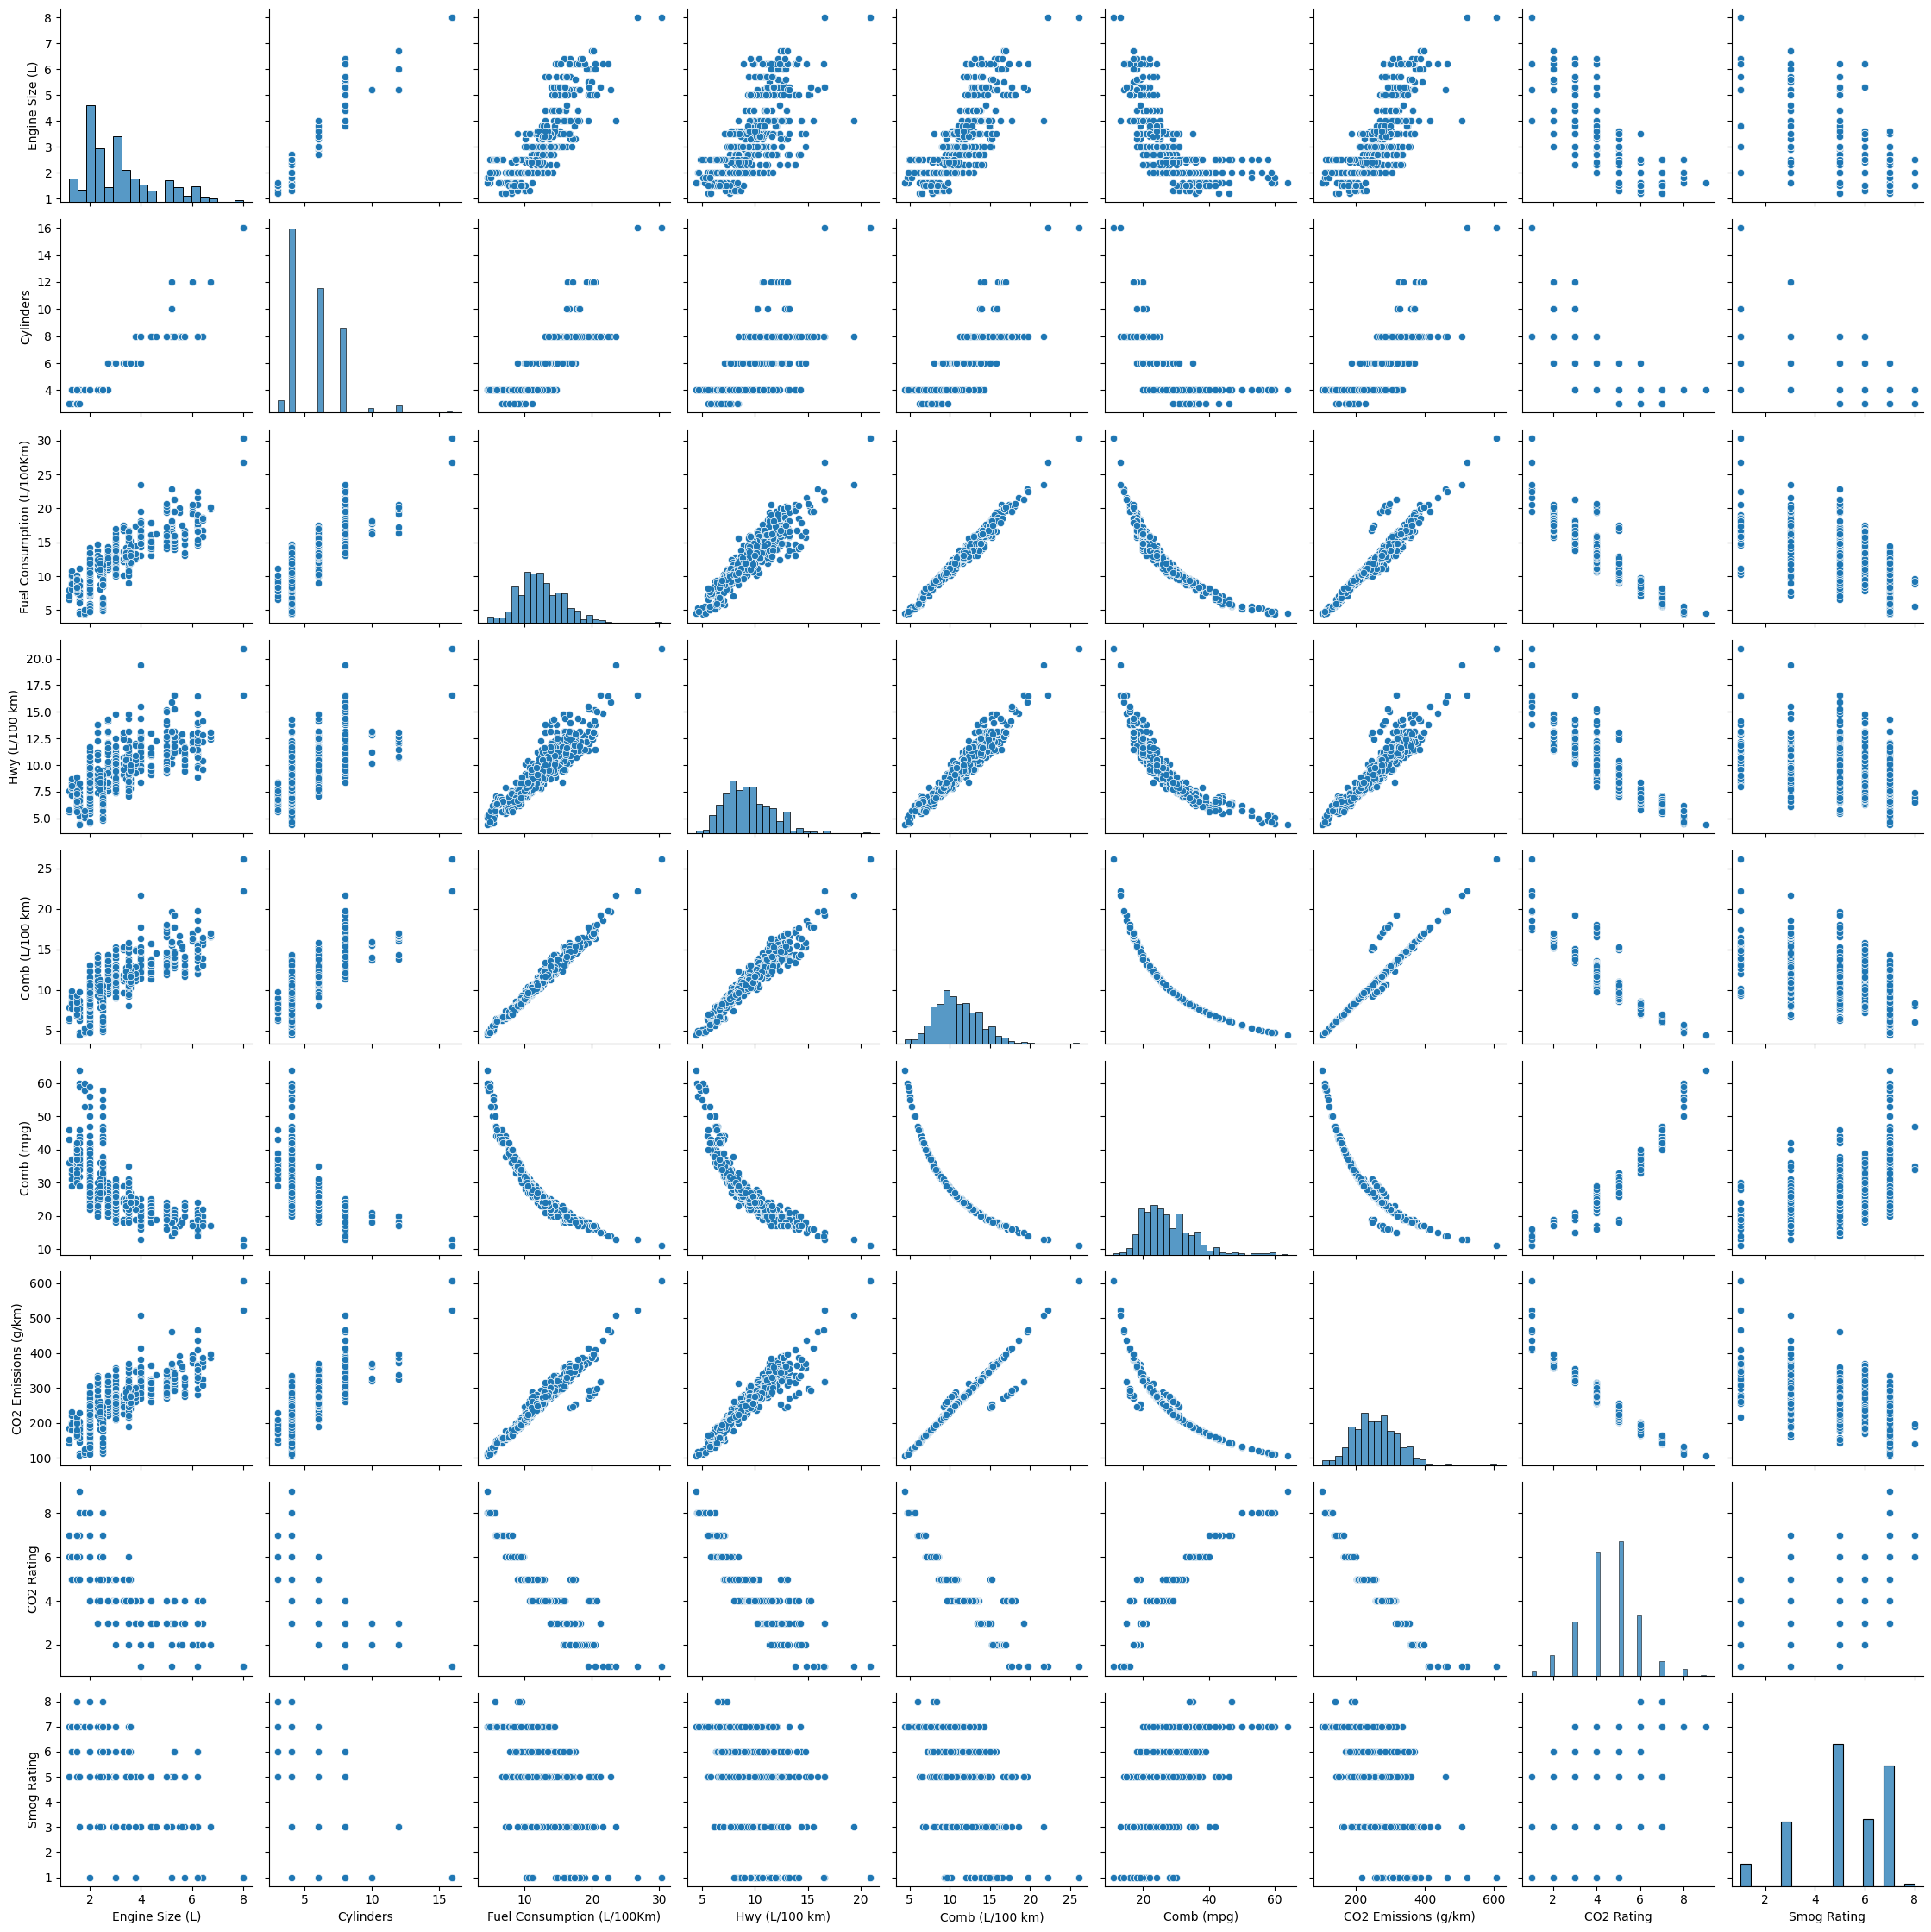

In [ ]:
# scatter plot to show relationship bewteen data
sns.pairplot(df[numerical_cols], height=2.5)
plt.tight_layout()
plt.show()

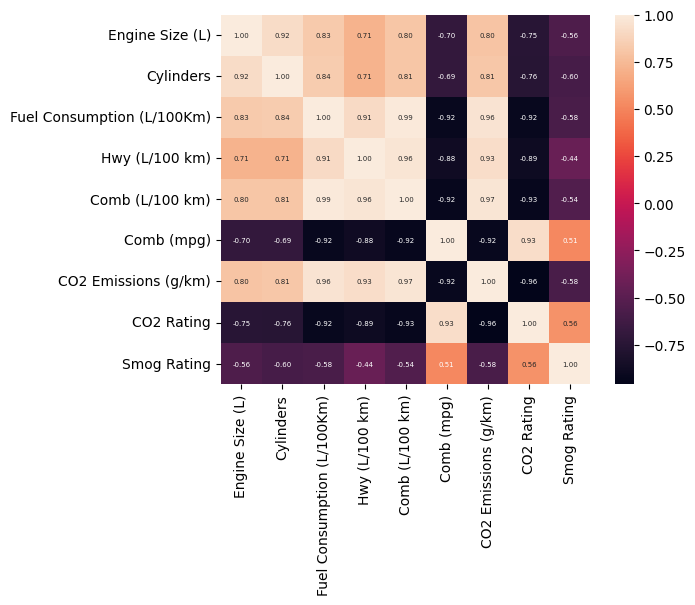

In [ ]:
# generating correlation matrix
cm = np.corrcoef(df[numerical_cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 5},
                 yticklabels=numerical_cols,
                 xticklabels=numerical_cols)
plt.show()

## Data Analysis

### Simple Linear Regression

In [ ]:
X_slr = df[['Comb (L/100 km)']]
y_slr = df['CO2 Emissions (g/km)']

X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(
    X_slr, y_slr, test_size=0.2, random_state=42
)

In [ ]:
# Initialize model
slr = LinearRegression()
# Train model
slr.fit(X_train_slr, y_train_slr)

LinearRegression()

In [ ]:
# Predict on the test set
y_train_pred_slr = slr.predict(X_train_slr)
y_test_pred_slr = slr.predict(X_test_slr)

# Calculate RMSE and R²
train_rmse_slr = np.sqrt(mean_squared_error(y_train_slr, y_train_pred_slr))
train_r2_slr = r2_score(y_train_slr, y_train_pred_slr)
test_rmse_slr = np.sqrt(mean_squared_error(y_test_slr, y_test_pred_slr))
test_r2_slr = r2_score(y_test_slr, y_test_pred_slr)

print("SLR Metrics:")
print(f"Training RMSE: {train_rmse_slr}, Training R²: {train_r2_slr}")
print(f"Testing RMSE: {test_rmse_slr}, Testing R²: {test_r2_slr}")

SLR Metrics:
Training RMSE: 17.12226292240099, Training R²: 0.9319357969579734
Testing RMSE: 13.939129849343628, Testing R²: 0.9411647818019601


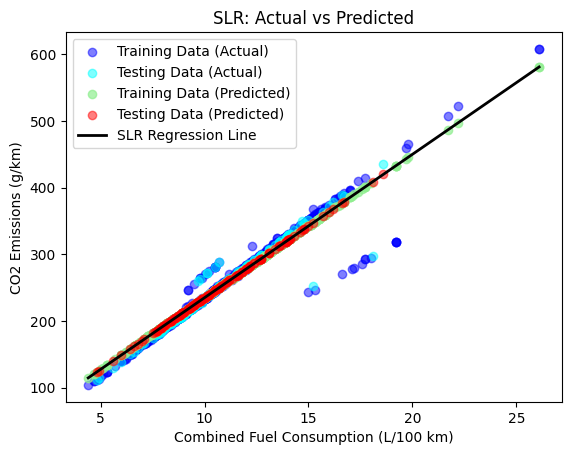

In [ ]:
# Scatter plot of actual data
plt.scatter(X_train_slr, y_train_slr, color='blue', alpha=0.5, label='Training Data (Actual)')
plt.scatter(X_test_slr, y_test_slr, color='cyan', alpha=0.5, label='Testing Data (Actual)')

# Scatter plot of predicted data
plt.scatter(X_train_slr, y_train_pred_slr, color='lightgreen', alpha=0.7, label='Training Data (Predicted)')
plt.scatter(X_test_slr, y_test_pred_slr, color='red', alpha=0.5, label='Testing Data (Predicted)')

# Plot regression line
X_min = pd.DataFrame([[X_slr.min().values[0]]], columns=X_slr.columns)
X_max = pd.DataFrame([[X_slr.max().values[0]]], columns=X_slr.columns)
plt.plot(
    [X_slr.min().values[0], X_slr.max().values[0]],
    [slr.predict(X_min)[0], slr.predict(X_max)[0]],
    color='black', label='SLR Regression Line', linewidth=2
)

# Adding labels, title, and legend
plt.xlabel('Combined Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('SLR: Actual vs Predicted')
plt.legend()
plt.show()


### Multiple Linear Regression

In [ ]:
features = ['Engine Size (L)', 'Fuel Consumption (L/100Km)', 'Hwy (L/100 km)', 'Comb (L/100 km)']
target = ['CO2 Emissions (g/km)']

X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
# Predict and evaluate
y_train_pred_mlr = linear_reg.predict(X_train_scaled)
y_test_pred_mlr = linear_reg.predict(X_test_scaled)

train_rmse_mlr = np.sqrt(mean_squared_error(y_train, y_train_pred_mlr))
train_r2_mlr = r2_score(y_train, y_train_pred_mlr)
test_rmse_mlr = np.sqrt(mean_squared_error(y_test, y_test_pred_mlr))
test_r2_mlr = r2_score(y_test, y_test_pred_mlr)

# Print results
print("Multiple Linear Regression Metrics:")
print(f"Training RMSE: {train_rmse_mlr}, Training R²: {train_r2_mlr}")
print(f"Testing RMSE: {test_rmse_mlr}, Testing R²: {test_r2_mlr}")

Multiple Linear Regression Metrics:
Training RMSE: 16.878757411390996, Training R²: 0.9338579908154246
Testing RMSE: 13.992973678657252, Testing R²: 0.9407093685930752


### Classification Trees

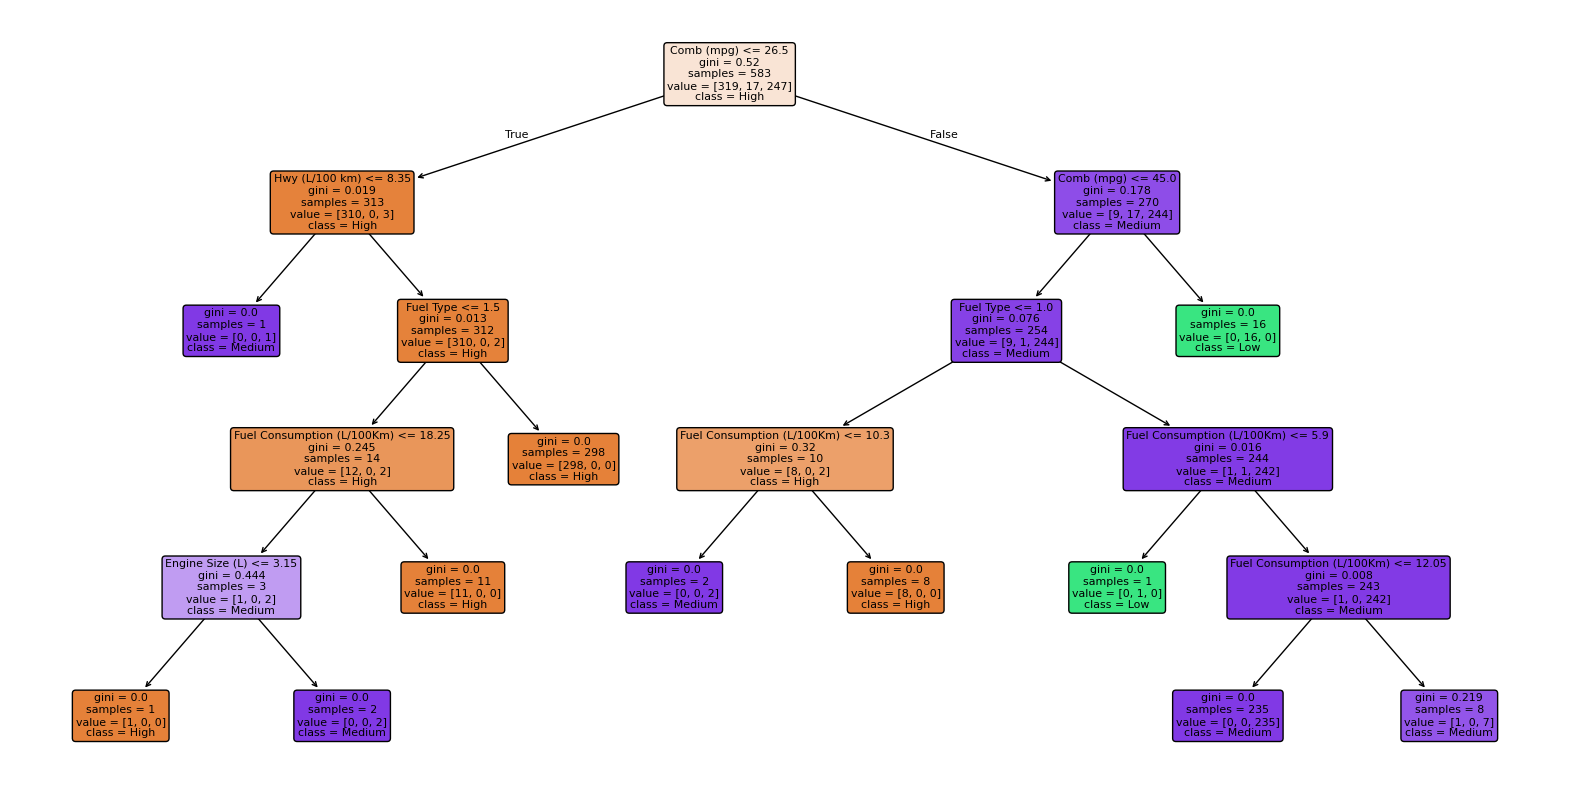

In [ ]:
# Drop rows with missing values
cleaned_data = df.dropna()

# Create CO2 Emissions category based on thresholds
def classify_co2(emission):
    if emission <= 150:
        return "Low"
    elif 150 < emission <= 250:
        return "Medium"
    else:
        return "High"

cleaned_data['CO2 Category'] = cleaned_data['CO2 Emissions (g/km)'].apply(classify_co2)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for col in categorical_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le

# Define features and target
features = cleaned_data[['Engine Size (L)', 'Cylinders', 'Fuel Consumption (L/100Km)',
                         'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)'] + categorical_cols]
target = cleaned_data['CO2 Category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Build a classification tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()


Classification Tree Metrics: 
        precision    recall  f1-score
High     1.000000  0.983333  0.991597
Low      1.000000  1.000000  1.000000
Medium   0.984127  1.000000  0.992000


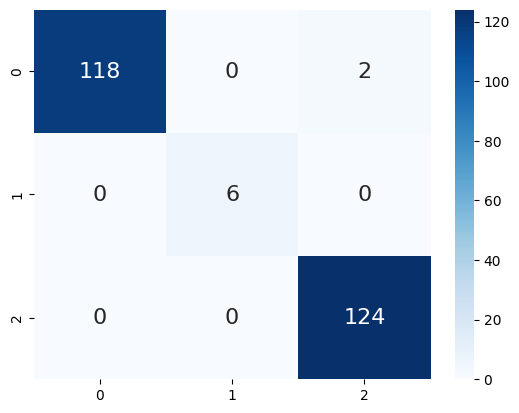

In [ ]:
# Predictions on the test set
y_pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size' : 16})

# Classification report for precision, recall, and F1-score
print("\nClassification Tree Metrics: ")
report = classification_report(y_test, y_pred, output_dict=True)
report1 = {label: {key: metrics[key] for key in ['precision', 'recall', 'f1-score']}
                     for label, metrics in report.items() if label in clf.classes_}
report1_df = pd.DataFrame(report1).T
print(report1_df)

### Random Forest

Training RMSE: 1.2929282020200055
Training R²: 0.9996118985567529
Testing RMSE: 2.7417356311748557
Testing R²: 0.9977237644955934


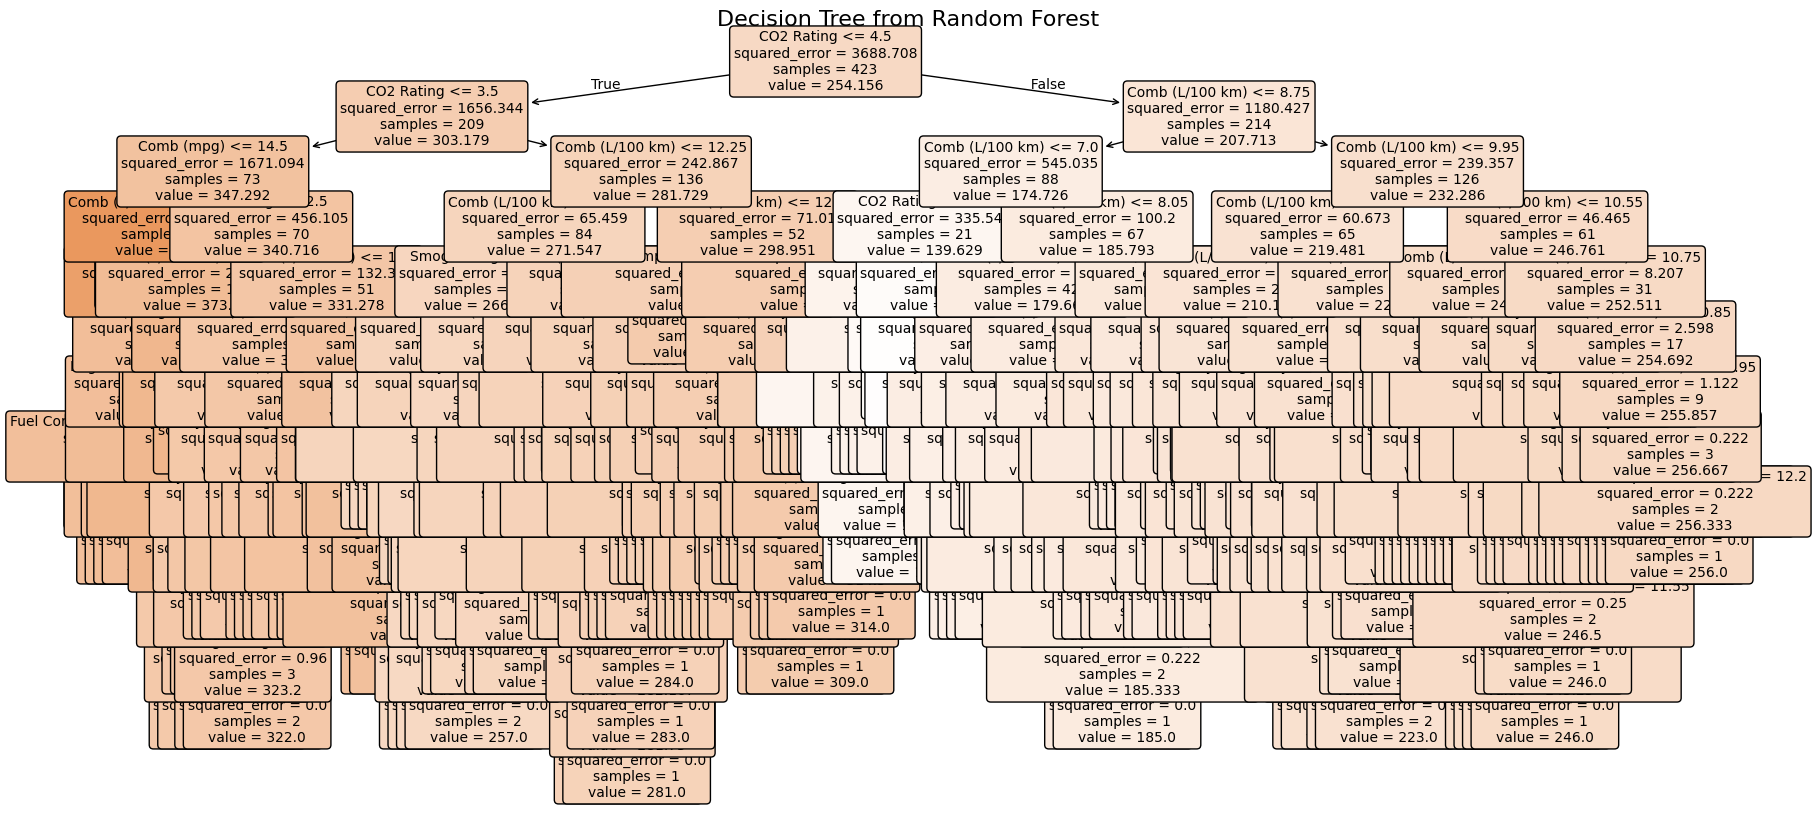

In [ ]:
# Drop rows with missing values
data_cleaned = df.dropna()

# Select relevant features and target
features = [
    "Engine Size (L)", "Cylinders", "Fuel Consumption (L/100Km)",
    "Hwy (L/100 km)", "Comb (L/100 km)", "Comb (mpg)", "CO2 Rating", "Smog Rating"
]
target = "CO2 Emissions (g/km)"

X = data_cleaned[features]
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
# Testing Metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R²: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R²: {test_r2}")

# Visualize one of the trees in the Random Forest
tree = model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest", fontsize=16)
plt.show()

### Ridge Regression: Numerical Features

In [ ]:
# Define a range of alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
# Use GridSearchCV to find the best alpha
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')
ridge_cv.fit(X_train, y_train)

print(f"Best alpha (regularization parameter): {ridge_cv.best_params_['alpha']}")


Best alpha (regularization parameter): 1


In [ ]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# model evaluation
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Ridge regression of numerical features metrics:")
print(f"Training RMSE: {train_rmse}")
print(f"Training R²: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")


Ridge regression of numerical features metrics:
Training RMSE: 12.436086381491409
Training R²: 0.9640942584457968
Test RMSE: 9.207352150768223
Test R²: 0.9743294278443412


### Ridge Regression: Categorical Features

In [ ]:
# Organizing categorical columns
X = df.drop(columns = ['Year',
    'Engine Size (L)',
    'Cylinders',
    'Fuel Consumption (L/100Km)',
    'Hwy (L/100 km)',
    'Comb (L/100 km)',
    'Comb (mpg)',
    'CO2 Emissions (g/km)',
    'CO2 Rating',
    'Smog Rating'])

# Have CO2 Emissions as target variable
y = df['CO2 Emissions (g/km)']

# Converts the categorical features into numerical features
X = pd.get_dummies(X, drop_first = False)

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Use ridge regression as it prevents multicollinerity between features and restricts how large the coefficients of our features can get
ridgeReg = Ridge(alpha = 0.1)
ridgeReg.fit(X_train_scaled, y_train)

# Get the predicted carbon emissions
y_test_pred = ridgeReg.predict(X_test_scaled)
y_train_pred = ridgeReg.predict(X_train_scaled)

# Get feature names from X_train
featurenames = X_train.columns

# Get coefficients of features and y-intercept
coefficients = ridgeReg.coef_
yintercept = ridgeReg.intercept_

# displays the y-intercept
print(f"Y-intercept: {yintercept: .2f}")

# Get coefficients of each fuel type
FT_col = ['Fuel Type_D', 'Fuel Type_Z', 'Fuel Type_E', 'Fuel Type_X']
FT_coefficients = [coefficients[featurenames.get_loc(col)] for col in FT_col]

# Get coefficients of each make
Make_col = ['Make_Acura', 'Make_Alfa Romeo','Make_Aston Martin','Make_Audi','Make_Bentley','Make_BMW','Make_Bugatti','Make_Buick','Make_Cadillac','Make_Chevrolet','Make_Chrysler','Make_Dodge','Make_FIAT',
'Make_Ford','Make_Genesis','Make_GMC','Make_Honda','Make_Hyundai','Make_Infiniti','Make_Jaguar','Make_Jeep','Make_Kia','Make_Lamborghini','Make_Land Rover','Make_Lexus','Make_Lincoln','Make_Maserati','Make_Mazda','Make_Mercedes-Benz','Make_MINI',
'Make_Mitsubishi','Make_Nissan','Make_Porsche','Make_Ram','Make_Rolls-Royce','Make_Subaru','Make_Toyota','Make_Volkswagen','Make_Volvo']
Make_coefficients = [coefficients[featurenames.get_loc(col)] for col in Make_col]

# Get coefficients of each vehicle class
Vehicle_Class_col = ['Vehicle Class_Full-size','Vehicle Class_SUV: Small','Vehicle Class_SUV: Standard','Vehicle Class_Compact','Vehicle Class_Mid-size','Vehicle Class_Minicompact','Vehicle Class_Two-seater','Vehicle Class_Subcompact',
                     'Vehicle Class_Station wagon: Small','Vehicle Class_Station wagon: Mid-size','Vehicle Class_Pickup truck: Small','Vehicle Class_Pickup truck: Standard','Vehicle Class_Minivan',
                     'Vehicle Class_Special purpose vehicle']
Vehicle_Class_coefficients = [coefficients[featurenames.get_loc(col)] for col in Vehicle_Class_col]

# Get coefficients of each transmission type
Transmission_col = ['Transmission_A10', 'Transmission_A6','Transmission_A7','Transmission_A8','Transmission_A9','Transmission_AM6',
                    'Transmission_AM7','Transmission_AM8','Transmission_AS10','Transmission_AS5', 'Transmission_AS6','Transmission_AS7',
                    'Transmission_AS8','Transmission_AS9','Transmission_AV','Transmission_AV1','Transmission_AV10','Transmission_AV6',
                    'Transmission_AV7','Transmission_AV8','Transmission_M5','Transmission_M6','Transmission_M7']
Transmission_coefficients = [coefficients[featurenames.get_loc(col)] for col in Transmission_col]


# Sorting the columns and coefficients of Fuel Type
FT_column_coefficient_pairs = list(zip(FT_col, FT_coefficients))
FT_Sorted = sorted(FT_column_coefficient_pairs, key = lambda x: x[1], reverse = True)
FT_sorted_columns, FT_sorted_coefficients = zip(*FT_Sorted)

# Sorting the columns and coefficients of Make
Make_column_coefficient_pairs = list(zip(Make_col, Make_coefficients))
Make_Sorted = sorted(Make_column_coefficient_pairs, key = lambda x: x[1], reverse = True)
Make_sorted_columns, Make_sorted_coefficients = zip(*Make_Sorted)

# Sorting the columns and coefficients of Vehicle Class
Vehicle_Class_column_coefficient_pairs = list(zip(Vehicle_Class_col, Vehicle_Class_coefficients))
Vehicle_Class_Sorted = sorted(Vehicle_Class_column_coefficient_pairs, key = lambda x: x[1], reverse = True)
Vehicle_Class_sorted_columns, Vehicle_Class_sorted_coefficients = zip(*Vehicle_Class_Sorted)

# Sorting the columns and coefficients of Transmission Type
Transmission_column_coefficient_pairs = list(zip(Transmission_col, Transmission_coefficients))
Transmission_Sorted = sorted(Transmission_column_coefficient_pairs, key = lambda x: x[1], reverse = True)
Transmission_sorted_columns, Transmission_sorted_coefficients = zip(*Transmission_Sorted)

# Sort by importance
sorted_idx = np.argsort(coefficients)[::1]
top_features = featurenames[sorted_idx][:100]
top_coefficients = coefficients[sorted_idx][:100]


Y-intercept:  259.65


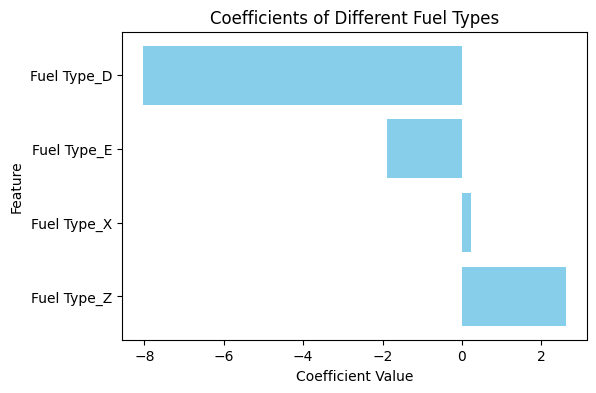

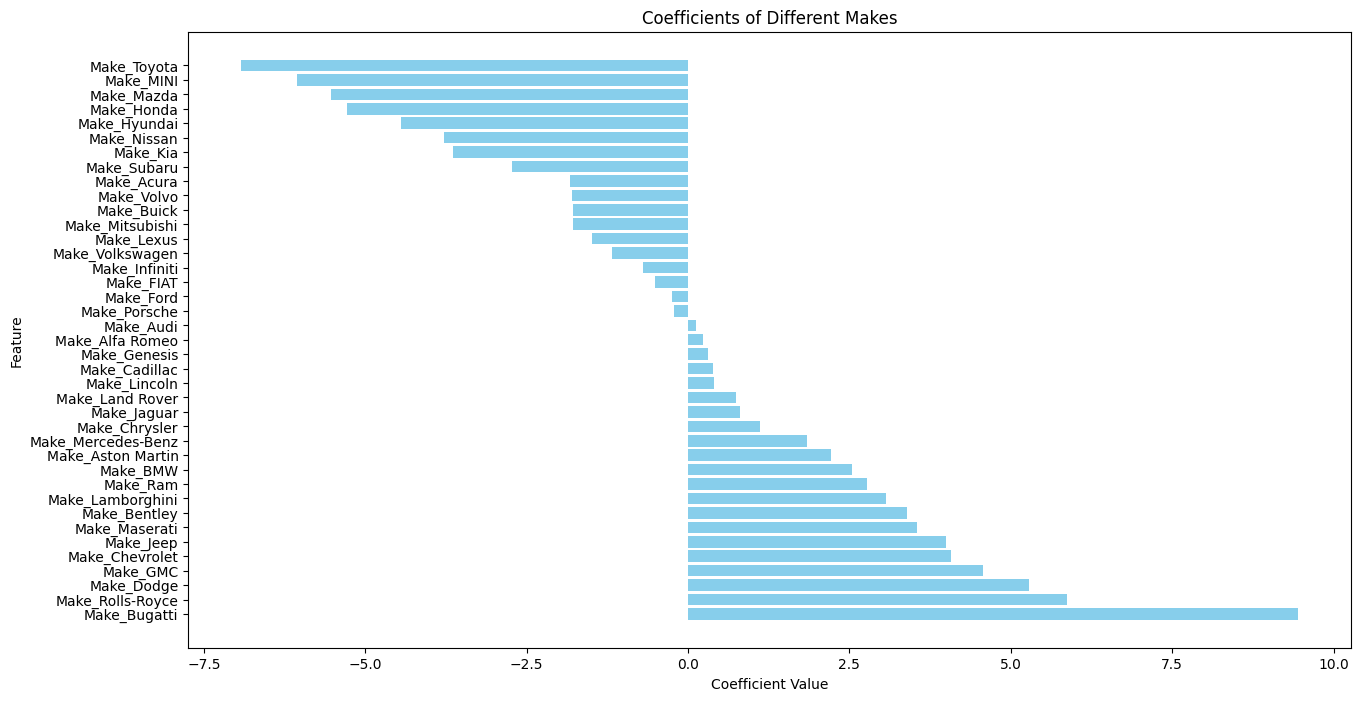

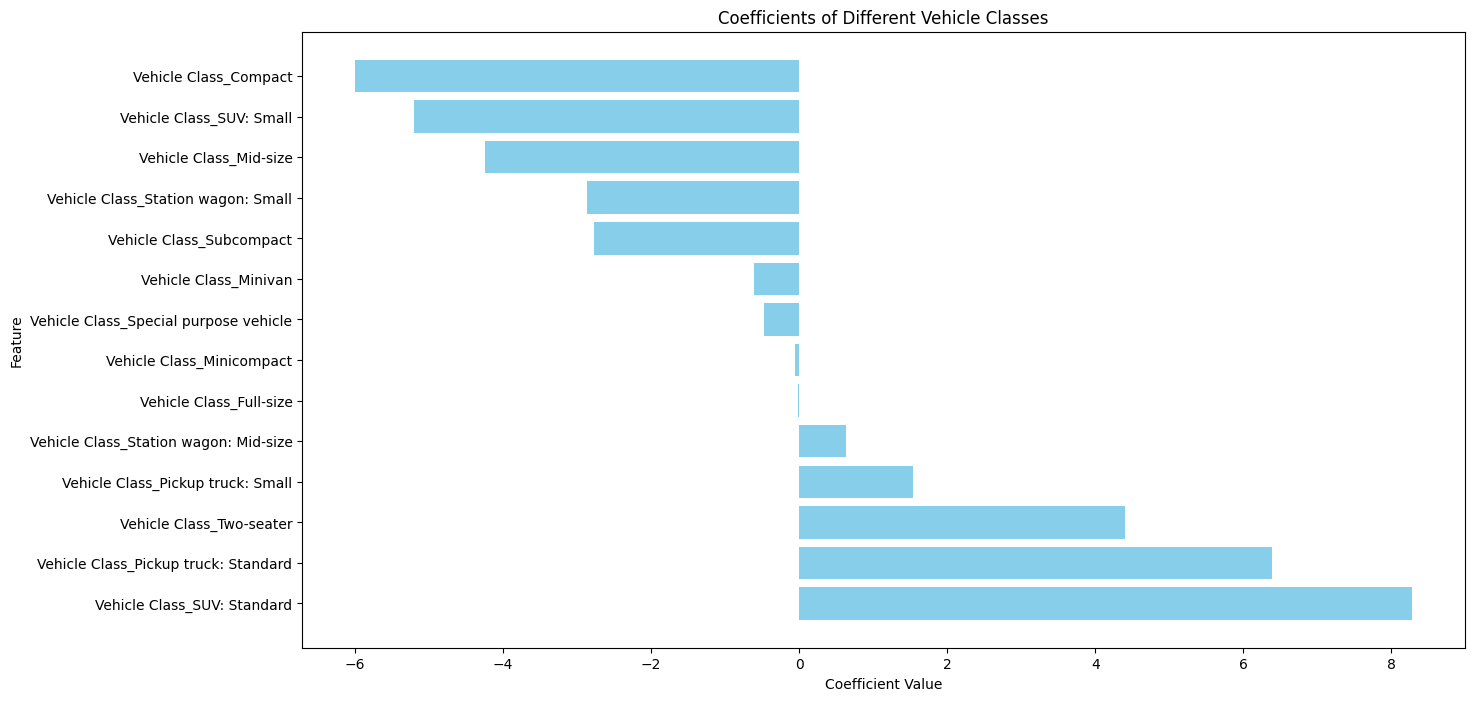

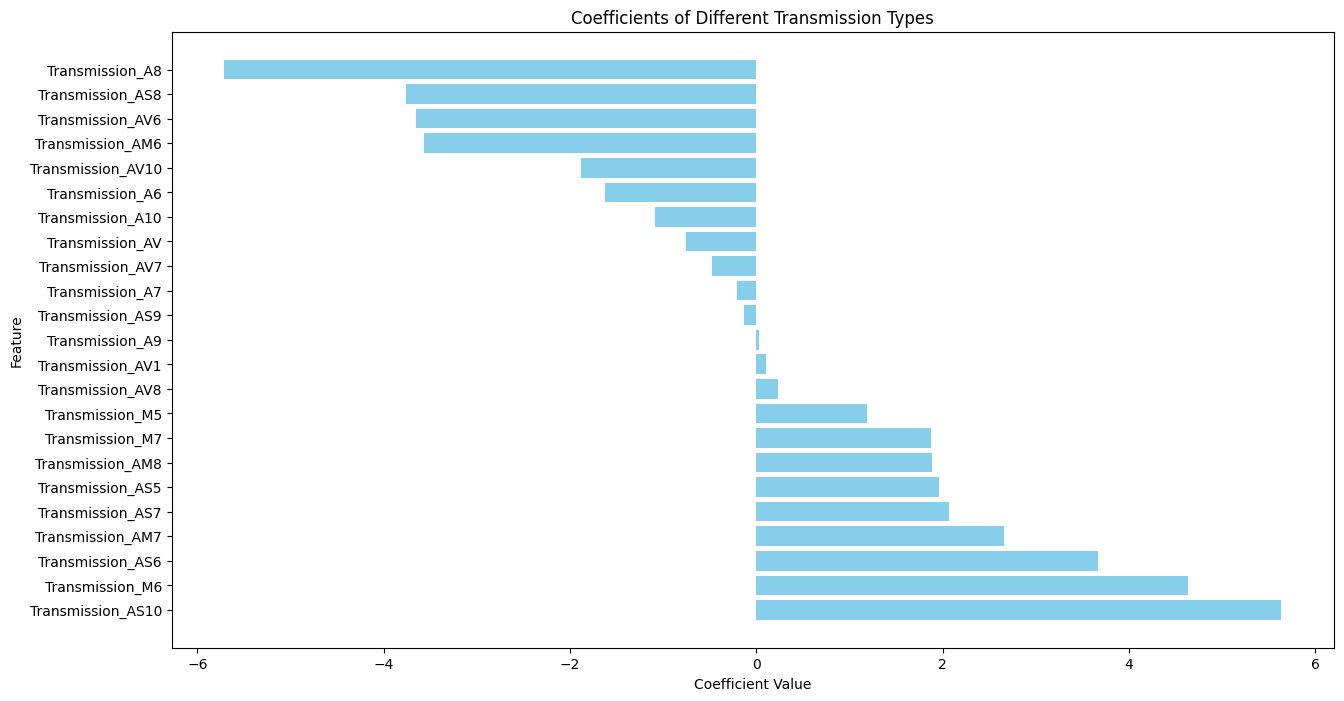

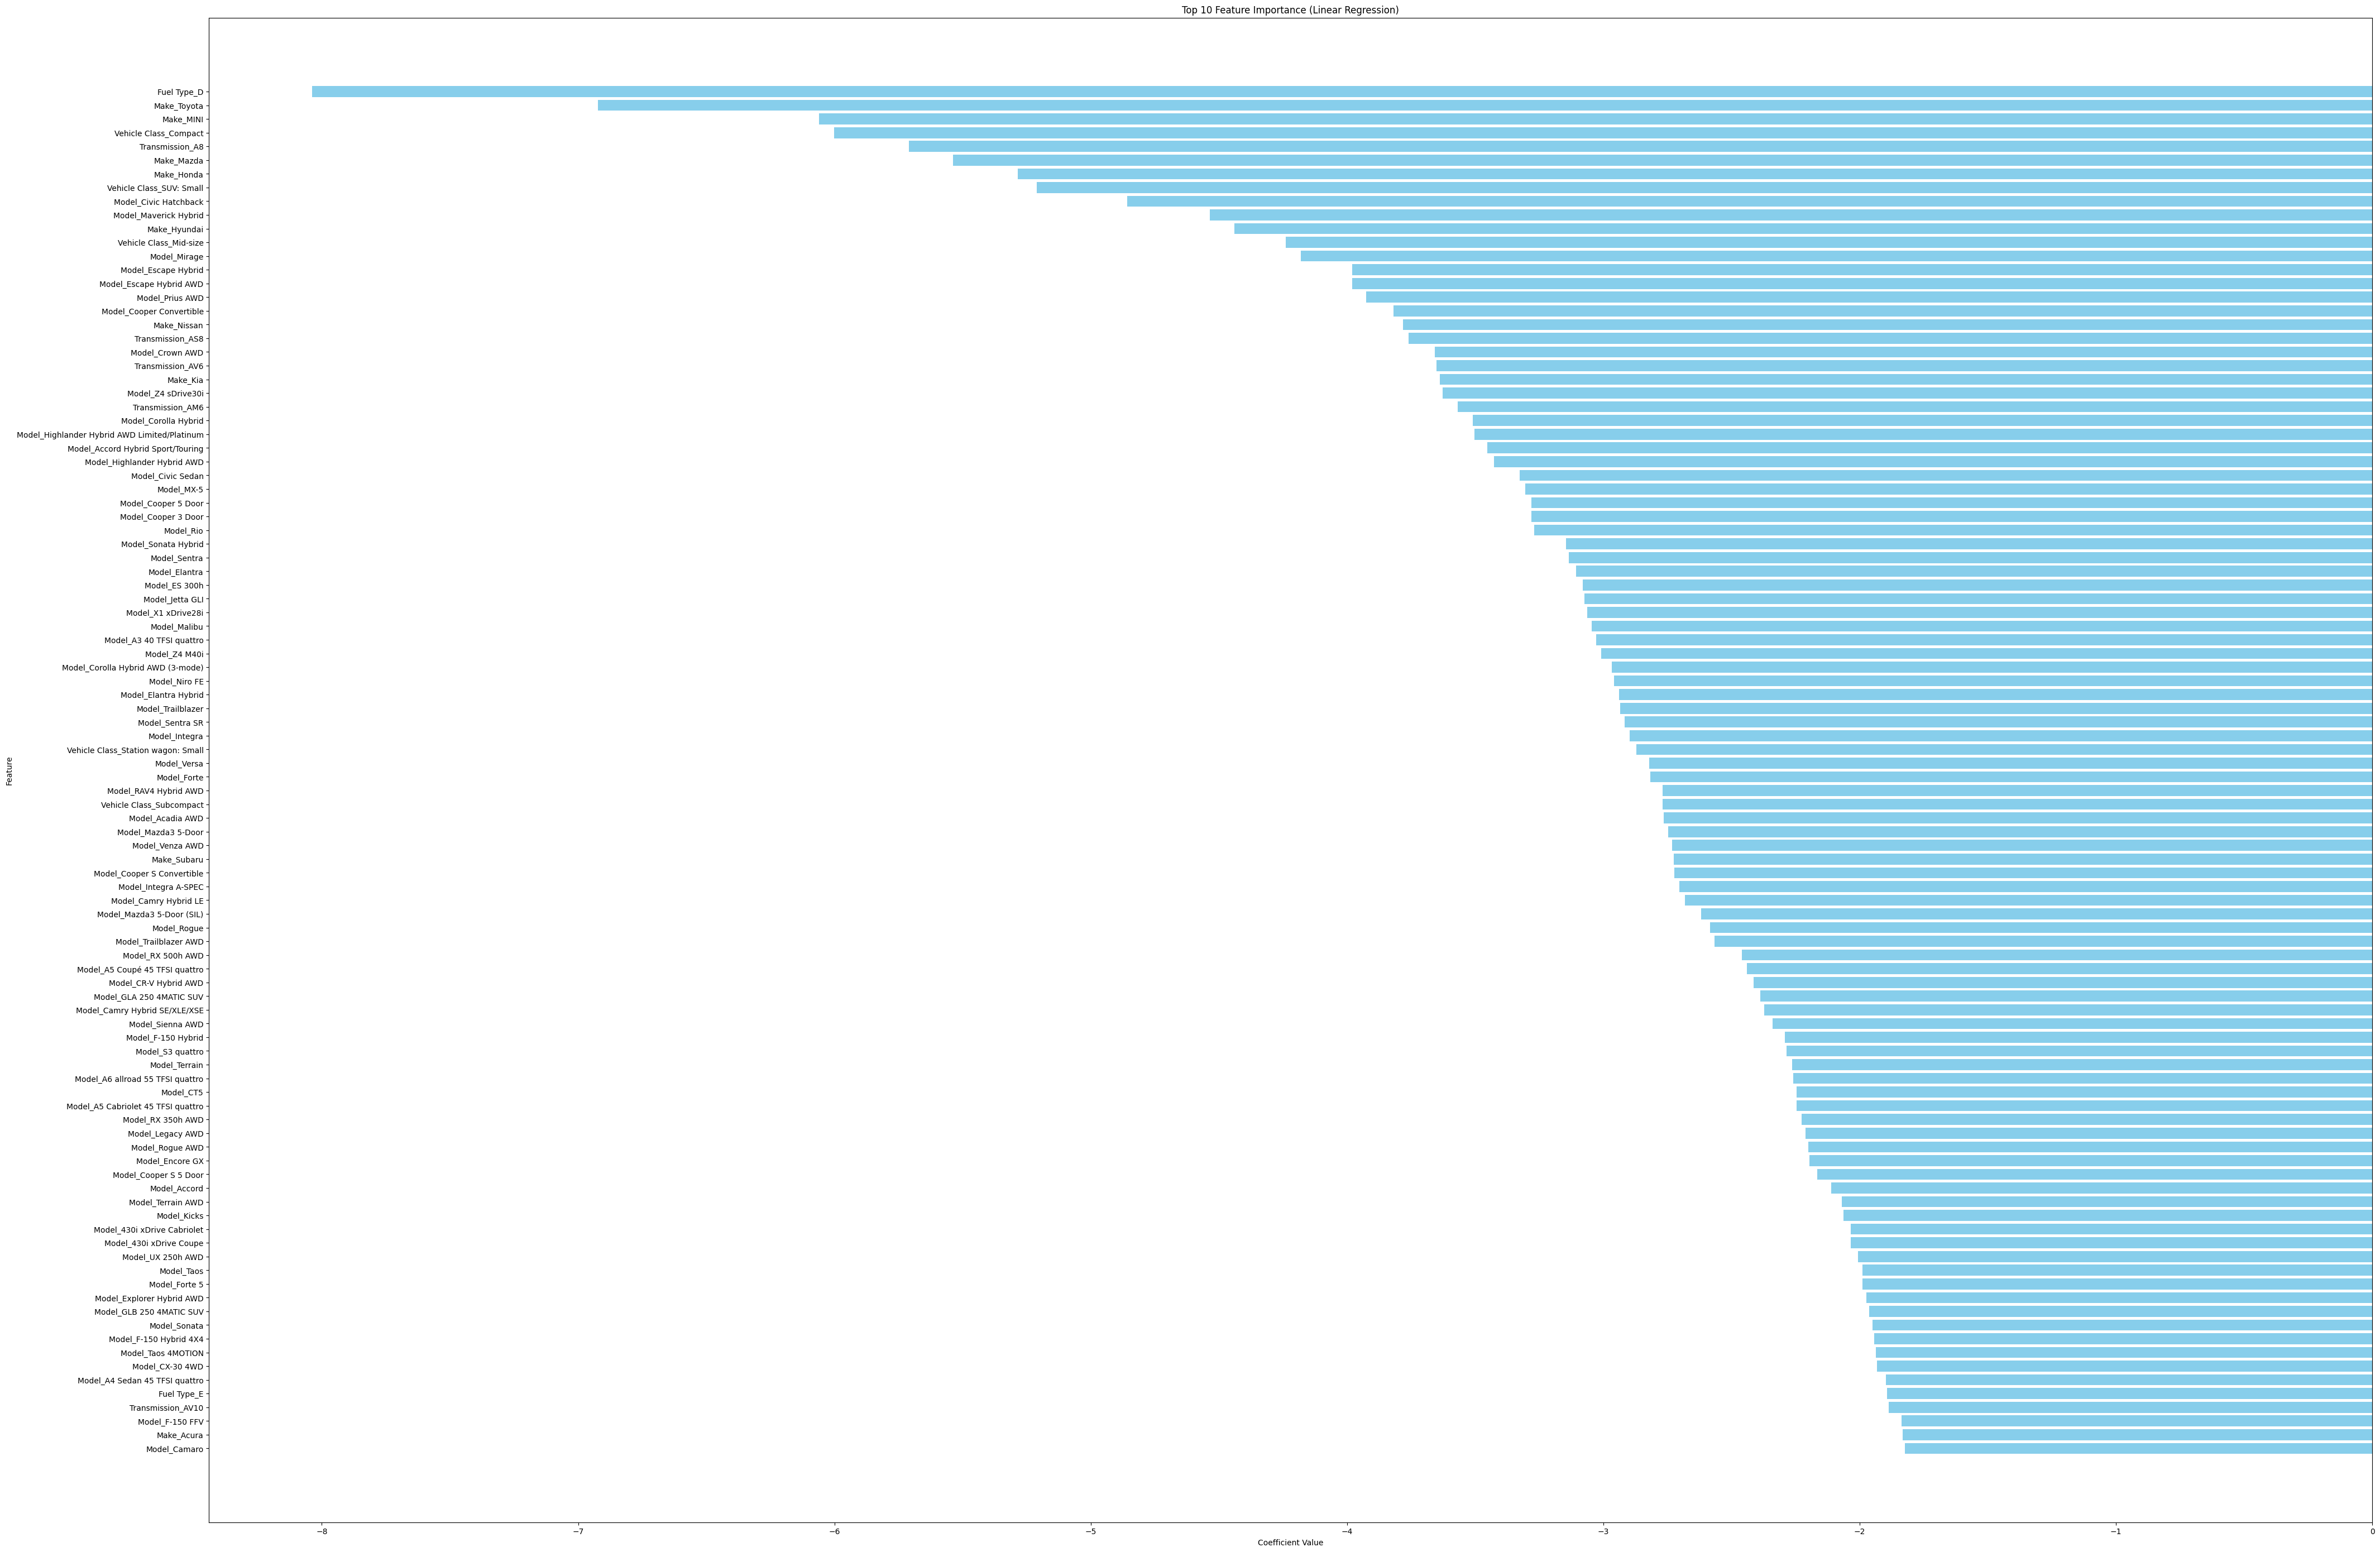

In [ ]:
# plots each Fuel Type column against its coefficient
plt.figure(figsize = (6, 4))
plt.barh(FT_sorted_columns, FT_sorted_coefficients, color = 'skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Different Fuel Types')
plt.show()

# plots each Make column against its coefficient
plt.figure(figsize = (15, 8))
plt.barh(Make_sorted_columns, Make_sorted_coefficients, color = 'skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Different Makes')
plt.show()

# plots each Vehicle Class column against its coefficient
plt.figure(figsize = (15, 8))
plt.barh(Vehicle_Class_sorted_columns, Vehicle_Class_sorted_coefficients, color = 'skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Different Vehicle Classes')
plt.show()

# plots each Transmission column against its coefficient
plt.figure(figsize = (15, 8))
plt.barh(Transmission_sorted_columns, Transmission_sorted_coefficients, color = 'skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Different Transmission Types')
plt.show()


# Plot feature importance
plt.figure(figsize=(50, 35))
plt.barh(top_features, top_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# reporting metrics
rmse_ridge_reg_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_ridge_reg_train = r2_score(y_train, y_train_pred)
rmse_ridge_reg_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_ridge_reg_test = r2_score(y_test, y_test_pred)

print("Ridge regression of categorical features metrics:")
print(f"Training RMSE: {train_rmse}")
print(f"Training R²: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Ridge regression of categorical features metrics:
Training RMSE: 12.436086381491409
Training R²: 0.9640942584457968
Test RMSE: 9.207352150768223
Test R²: 0.9743294278443412
